In [63]:
from Syn_data_gen import generate_synthetic_ratings
import matplotlib.pyplot as plt

In [66]:
ratings_df, long_df, meta = generate_synthetic_ratings(
    n_users=100,
    n_items=2,
    n_factors=6,
    n_groups=5,
    group_strength=0.1,
    user_noise=0.1,
    item_scale=0.1,
    item_bias_std=0.0,
    user_bias_std=0.0,
    global_mean=0.0,
    noise_std=0.05,
    missing_prob=0.0,
    rating_min=None,
    rating_max=None,
    #random_seed=2025
)

print("Generated matrix shape:", ratings_df.shape)

ratings_df

Generated matrix shape: (100, 2)


,item_0,item_1
user_0,0.002040,-0.040734
user_1,0.057663,-0.221831
user_2,0.358627,-0.090727
user_3,-0.063512,0.119206
user_4,-0.316569,0.272093
...,...,...
user_95,-0.020529,-0.066992
user_96,-0.387542,0.282457
user_97,0.369777,-0.050465
user_98,0.333210,-0.023430


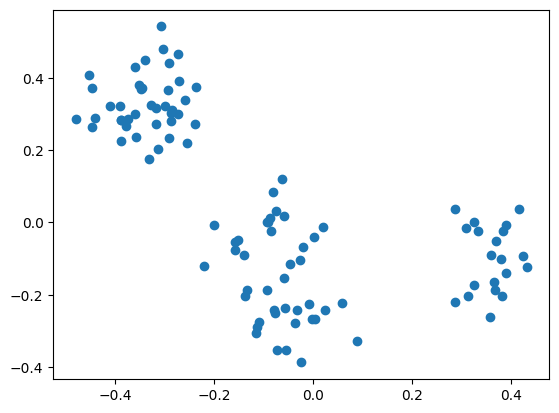

In [67]:
plt.scatter(ratings_df['item_0'], ratings_df['item_1'])

In [30]:
import numpy as np
rand_gen =  np.random.default_rng()

user_bias = rand_gen.normal(loc=0.0, scale=5.0, size=100)
item_bias = rand_gen.normal(loc=0.0, scale=0.1, size=2)

# Compute raw ratings matrix
print(user_bias[:, None] + item_bias[None, :])

[[ -5.16274708  -5.16624155]
 [  7.25935083   7.25585636]
 [ -1.05521966  -1.05871412]
 [  2.95629409   2.95279962]
 [  5.74415853   5.74066407]
 [  5.7654253    5.76193084]
 [ -0.44364573  -0.4471402 ]
 [ -1.30866671  -1.31216117]
 [ -3.59024295  -3.59373742]
 [ -3.81334092  -3.81683539]
 [ -6.37020575  -6.37370022]
 [  2.94453789   2.94104342]
 [ -1.77111857  -1.77461303]
 [  4.11649282   4.11299835]
 [  0.17778242   0.17428795]
 [  5.38574488   5.38225041]
 [  0.70522366   0.70172919]
 [ -0.27811533  -0.28160979]
 [  8.11638724   8.11289277]
 [ -2.02662586  -2.03012033]
 [ -1.91832572  -1.92182019]
 [  2.12157972   2.11808526]
 [ -6.51951951  -6.52301398]
 [ -2.66426222  -2.66775669]
 [ -4.80739051  -4.81088498]
 [  4.02742292   4.02392845]
 [ -1.8955329   -1.89902737]
 [  4.03038338   4.02688892]
 [  3.17537935   3.17188489]
 [  2.47632977   2.47283531]
 [  2.67699646   2.673502  ]
 [ 11.75620461  11.75271015]
 [  1.27075686   1.2672624 ]
 [ -3.29697005  -3.30046451]
 [  0.55558088